# HUMAH RIGHTS MEDIA ANALYSIS

Classification of Article Credibility (Low, Medium & High)
-

Code in this notebook
--

- The code in this notebook predicts the credibility label/score of human rights media articles using Machine Learning.

Libraries & Modules
--

- scikit learn and imbalanced learn for machine learning classification and dealing with the imbalance in the dataset.

- matplotlib & seaborn for visualizing plotting roc curve & feature importance scores.

- numpy to find the mean of a list of floating point values when finding important features.

- pandas is used to load the dataset and create a dataframe.

- datetime is used to calculate the run time of a certain model.

How to use the notebook
--

- **Step 1:** Load the dataset (csv file used in this notebook).

- **Step 2:** Fill any empty cells in the dataframe with zeros to prevent the following error: "Input contains NaN, infinity or a value too large for dtype('float32')."

- **Step 3:** Convert or map string values to integers for each column you will include when fitting the classifier.

- **Step 4:** Separate the dataset into features and labels (independent and dependent variables).

- **Step 5:** Put the features and labels into dataframes, X (features) and y (labels).

- **Step 6:** Split the dataset into testing and training data. You can adjust the **test_size** parameter for the _**train_test_split**_ function depending on your preferences. In this notebook, we use 10% for testing and 90% for training.

- **Step 7:** Initialize models and adjust hyperparameters to preference.

- **Step 8:** Pass model(s) to analyze_model function and wait for results.

**Note:** In the Functions Definition section, the **analyze_model** function calls _display_model_feature_importance()_, _display_permutation_feature_importance()_ & _display_mdi_feature_importance()_. Comment these functions when analyzing models that have no feature importance functionality. Examples of such models are: _BalancedBaggingClassifier_ & _EasyEnsembleClassifier_.

Import libraries
-

In [2]:
# import libraries
import random
import datetime
import pandas as pd

# libraries for machine learning and model evaluation
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# libraries for dealing with imbalanced data
import numpy as np
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# libraries for visualization
import seaborn as sb
import matplotlib.pyplot as plt

# Define functions

In [3]:
'''fit a defined model'''
def train_model(model):
    model.fit(X_train, y_train.values.ravel())

In [4]:
'''get the set of labels predicted by the model'''
def get_predicted_labels(model, X_test):
    labels = model.predict(X_test)
    return labels

In [5]:
'''calculate and print the accuracy score of a model'''
def print_model_accuracy(y_test, y_pred):  # y_test is already defined, y_pred is specific to each model
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy}")

In [6]:
'''print feature importance scores'''
def print_importance_scores(importance_scores):
    for i,v in enumerate(importance_scores):
        print('Feature: %0d, Score: %.5f' % (i,v))

In [7]:
'''calculate & graph feature importance scores using the classifier's feature_importances_ component'''
def display_model_feature_importance(model, features):
    print("Feature Importance from Model")
    print('-'*29)
    importance_scores = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)
    
    # print features & scores
    print_importance_scores(importance_scores)
    
    # create bar graph and display features & their scores using seaborn
    sb.barplot(x=importance_scores, y=features)  # alternatively, y=importance_scores.index
    
    # add labels
    plt.title("Feature Importance Graph")
    plt.xlabel('Importance Scores')
    plt.ylabel('Features')
    plt.show()

In [8]:
'''calculate and graph feature importances using permutation_importance'''
def display_permutation_feature_importance(model, X):
    print("Permutation Feature Importance")
    print('-'*30)
    # calculate permutation importance
    perm_imp = permutation_importance(model, X, y, scoring='accuracy')
    importance_scores = perm_imp.importances_mean
    
    # print features & scores
    print_importance_scores(importance_scores)

    # create bar graph and display features & their scores using seaborn
    sb.barplot(x=importance_scores, y=list(X.columns))
    
    # add labels
    plt.title('Permutation Importance Graph')
    plt.xlabel('Importance Scores')
    plt.ylabel('Features')
    plt.show()

In [9]:
'''get the feature importance based on Mean Decrease in Impurity'''
def display_mdi_feature_importance(model, features):
    print("Feature Importance based on Mean Decrease in Impurity(MDI)")
    print('-'*59)
    importances = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    importance_scores = pd.Series(importances, index=features)
    model_importances = pd.Series(importances, index=features)

    # plot the features and their scores on a bar graph with matplotlib
    fig, ax = plt.subplots()
    model_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

In [10]:
'''get classification report of model'''
def display_classification_report(y_pred):  # get the labels predicted by a model, pass to the function & print the classification report
    print("Classification Report:")
    print('-'*22)
    y_true = [random.randint(0,2) for _ in range(len(y_pred))]  # randomly generated true values
    target_names = ['medium', 'high']  # modify this list if low credibility articles are included
    print(classification_report(y_true, y_pred, target_names=target_names, labels=[1,2]))

In [11]:
'''evaluate model using confusion matrix output'''
def create_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
    return cm_df  # return value needed for classification report

In [12]:
'''report metrics using values from the confusion matrix'''
def report_classification_metrics(cm):
    print("\nClassification Metrics:")
    print('-'*23)
    TP = cm['Predicted Positive'][1]  # True Positives
    TN = cm['Predicted Negative'][0]  # True Negatives
    FP = cm['Predicted Positive'][0]  # False Positives
    FN = cm['Predicted Negative'][1]  # False Negatives
    
    # calculate True & False  Positive Rates
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    
    # calculate the six metrics
    total = sum([TP, TN, FP, FN])
    accuracy = (float(TP+TN)/float(total))
    precision = (TP/float(TP+FP))
    sensitivity = (TP/float(FN+TP))
    specificity = (TN/float(TN+FP))
    f1_score = 2 * ((precision * sensitivity)/(precision + sensitivity))
    mis_classification = 1 - accuracy
    
    # print results
    print(f'True Positives: {TP}')
    print(f'True Negatives: {TN}')
    print(f'False Positives: {FP}')
    print(f'False Negatives: {FN}')
    print()
    print(f'True Positive Rate: {TPR}')
    print(f'False Positive Rate: {FPR}')
    print()    
    print("The 6 metrics:")
    print('-'*15)
    print(f'F1 Score: {round(f1_score, 2)}')
    print(f'Accuracy: {round(accuracy, 2)}')
    print(f'Precision: {round(precision, 2)}')
    print(f'Specificity: {round(specificity, 2)}')
    print(f'Sensitivity: {round(sensitivity, 2)}')
    print(f'Mis-classification: {round(mis_classification, 2)}')

In [13]:
'''calculate & print the roc auc score'''
def print_roc_auc_score(model, X, y):
    score = roc_auc_score(y, model.predict_proba(X)[:, 1])
    print(f'ROC AUC Score: {score}')

In [14]:
'''calculate & print the mean roc auc score using k-fold cross-validation'''
def print_mean_roc_auc_score(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    mean_score = mean(scores)
    print(f'Mean ROC AUC Score: {mean_score}')

In [15]:
'''take a model and plot its ROC curve'''
def plot_roc_curve(model, X_test, y_test):
    metrics.plot_roc_curve(model, X_test, y_test)
    plt.title('ROC Curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [16]:
'''analyze a model. the only function to use, after you initialize the model'''
def analyze_model(model, X, X_test, y_test, features):
    train_model(model)
    y_pred = get_predicted_labels(model, X_test)
    print_model_accuracy(y_test, y_pred)
    print()
    # comment out feature importance code for Easy Ensemble & BalancedBaggingClassifier
#     display_model_feature_importance(model, features)
#     display_permutation_feature_importance(model, X)
#     display_mdi_feature_importance(model, features)
    print()
    display_classification_report(y_pred)
    cm = create_confusion_matrix(y_test, y_pred)
    print()
    print("Confusion Matrix:")
    display(cm)
    report_classification_metrics(cm)
    print()
    print_roc_auc_score(model, X, y)
    print()
    print_mean_roc_auc_score(model, X, y)
    print()
    plot_roc_curve(model, X_test, y_test)

Load dataset

In [17]:
df = pd.read_csv('dataset.csv')

Replace empty cells with 0s

In [18]:
df = df.fillna(0)

Map cred_score column values to integers

In [19]:
df['cred_score'] = df['cred_score'].map({'medium':1, 'high':2})

Get features and remove unwanted columns from the list

In [20]:
f = list(df.columns.values)
f.remove('id')
f.remove('publisher')
f.remove('entity_dict')
f.remove('cred_score')
f.remove('publisher_val')

# print remaining features
f

['polarity',
 'subjectivity',
 'entity_num',
 'entity_type_num',
 'num_quote',
 'quote_subjectivity',
 'quote_polarity',
 'num_sentences',
 'polarity_avg',
 'polarity sd',
 'polarity median',
 'polarity min-max',
 'polarity range',
 'mean',
 'median',
 'std',
 'max',
 'min',
 '80_perc',
 '60_perc',
 '40_perc',
 '20_perc',
 'num_over0.5',
 'num_over0.75']

Separate dataset into features and labels

In [21]:
features = f
labels = ['cred_score']

X = df[features]
y = df[labels]

Split data into training and testing set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)  # 10% testing and 90% training

# Now, define and fit models

# Standard Random Forest

Accuracy Score: 0.8842467436716638

Feature Importance from Model
-----------------------------
Feature: 0, Score: 0.04059
Feature: 1, Score: 0.03737
Feature: 2, Score: 0.04522
Feature: 3, Score: 0.02175
Feature: 4, Score: 0.01319
Feature: 5, Score: 0.01566
Feature: 6, Score: 0.01768
Feature: 7, Score: 0.03678
Feature: 8, Score: 0.03720
Feature: 9, Score: 0.04441
Feature: 10, Score: 0.03731
Feature: 11, Score: 0.04640
Feature: 12, Score: 0.03645
Feature: 13, Score: 0.05937
Feature: 14, Score: 0.04227
Feature: 15, Score: 0.07451
Feature: 16, Score: 0.06680
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.04925
Feature: 19, Score: 0.04913
Feature: 20, Score: 0.04154
Feature: 21, Score: 0.03278
Feature: 22, Score: 0.06828
Feature: 23, Score: 0.08608


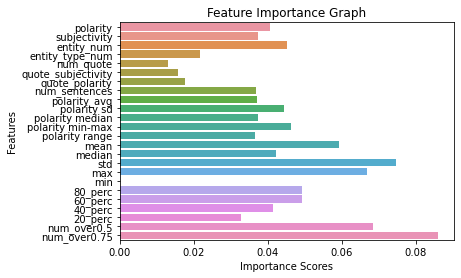

Permutation Feature Importance
------------------------------
Feature: 0, Score: 0.00382
Feature: 1, Score: 0.00174
Feature: 2, Score: 0.00923
Feature: 3, Score: 0.00068
Feature: 4, Score: 0.00055
Feature: 5, Score: 0.00023
Feature: 6, Score: 0.00037
Feature: 7, Score: 0.00809
Feature: 8, Score: 0.00091
Feature: 9, Score: 0.00543
Feature: 10, Score: 0.00046
Feature: 11, Score: 0.01162
Feature: 12, Score: 0.00054
Feature: 13, Score: 0.01071
Feature: 14, Score: 0.00052
Feature: 15, Score: 0.01848
Feature: 16, Score: 0.01379
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00333
Feature: 19, Score: 0.00166
Feature: 20, Score: 0.00119
Feature: 21, Score: 0.00183
Feature: 22, Score: 0.01203
Feature: 23, Score: 0.02316


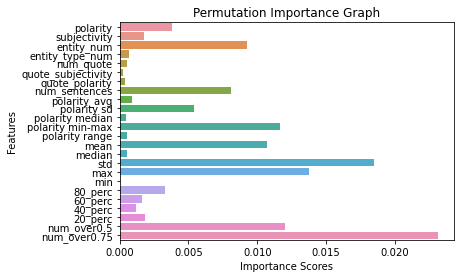

Feature Importance based on Mean Decrease in Impurity(MDI)
-----------------------------------------------------------

Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.33      0.09      0.14      1296
        high       0.34      0.92      0.50      1390

   micro avg       0.34      0.52      0.41      2686
   macro avg       0.34      0.50      0.32      2686
weighted avg       0.34      0.52      0.33      2686


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,247,381
Actual Positive,90,3351



Classification Metrics:
-----------------------
True Positives: 3351
True Negatives: 247
False Positives: 381
False Negatives: 90

True Positive Rate: 0.97384481255449
False Positive Rate: 0.606687898089172


The 6 metrics:
---------------
F1 Score: 0.93
Accuracy: 0.88
Precision: 0.9
Specificity: 0.39
Sensitivity: 0.97
Mis-classification: 0.12

ROC AUC Score: 0.9973508141673929

Mean ROC AUC Score: 0.9199233763504377



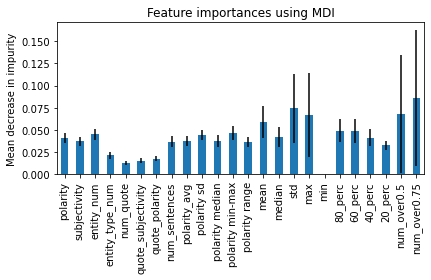

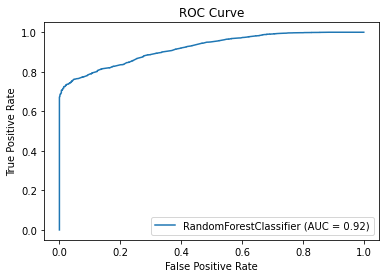

total time taken: 0:02:22.326365


In [49]:
start = datetime.datetime.now()

# initialize and analyze model
model = RandomForestClassifier(n_estimators=100)
analyze_model(model, X, X_test, y_test, features)

end = datetime.datetime.now()
print(f'total time taken: {end-start}')

# Dealing with imbalanced data using the ff models:
- Bagging
- Random Forest with Class Weighting
- Random Forest with Bootstrap Class Weighting
- Random Forest with Random Undersampling
- Bagging with Random Undersampling
- Easy Ensemble

# Standard Bagging

Standard Bagging
Accuracy Score: 0.8830179405259277

Feature Importance from Model
-----------------------------
Feature: 0, Score: 0.05045
Feature: 1, Score: 0.04278
Feature: 2, Score: 0.04950
Feature: 3, Score: 0.01888
Feature: 4, Score: 0.01270
Feature: 5, Score: 0.01639
Feature: 6, Score: 0.02052
Feature: 7, Score: 0.03430
Feature: 8, Score: 0.03840
Feature: 9, Score: 0.04714
Feature: 10, Score: 0.02510
Feature: 11, Score: 0.05227
Feature: 12, Score: 0.02429
Feature: 13, Score: 0.05736
Feature: 14, Score: 0.03481
Feature: 15, Score: 0.06447
Feature: 16, Score: 0.03956
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.03903
Feature: 19, Score: 0.03680
Feature: 20, Score: 0.03268
Feature: 21, Score: 0.03337
Feature: 22, Score: 0.01236
Feature: 23, Score: 0.21682


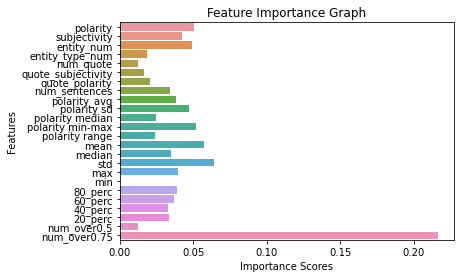

Permutation Feature Importance
------------------------------
Feature: 0, Score: 0.00935
Feature: 1, Score: 0.00343
Feature: 2, Score: 0.02711
Feature: 3, Score: 0.00400
Feature: 4, Score: 0.00020
Feature: 5, Score: 0.00041
Feature: 6, Score: 0.00137
Feature: 7, Score: 0.00963
Feature: 8, Score: 0.00175
Feature: 9, Score: 0.00532
Feature: 10, Score: 0.00007
Feature: 11, Score: 0.02174
Feature: 12, Score: 0.00031
Feature: 13, Score: 0.02987
Feature: 14, Score: 0.00092
Feature: 15, Score: 0.08089
Feature: 16, Score: 0.00637
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00254
Feature: 19, Score: 0.00111
Feature: 20, Score: 0.00097
Feature: 21, Score: 0.00174
Feature: 22, Score: 0.01877
Feature: 23, Score: 0.11635


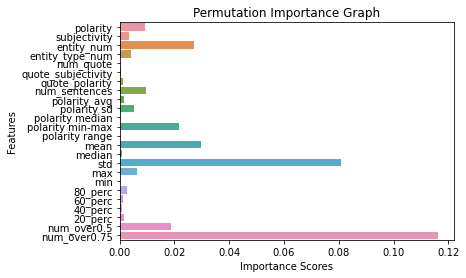

Feature Importance based on Mean Decrease in Impurity(MDI)
-----------------------------------------------------------

Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.32      0.09      0.14      1326
        high       0.35      0.92      0.51      1429

   micro avg       0.35      0.52      0.42      2755
   macro avg       0.34      0.50      0.32      2755
weighted avg       0.34      0.52      0.33      2755


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,250,378
Actual Positive,98,3343



Classification Metrics:
-----------------------
True Positives: 3343
True Negatives: 250
False Positives: 378
False Negatives: 98

True Positive Rate: 0.971519907003778
False Positive Rate: 0.6019108280254777


The 6 metrics:
---------------
F1 Score: 0.93
Accuracy: 0.88
Precision: 0.9
Specificity: 0.4
Sensitivity: 0.97
Mis-classification: 0.12

ROC AUC Score: 0.9969697188756202

Mean ROC AUC Score: 0.9184316524619918



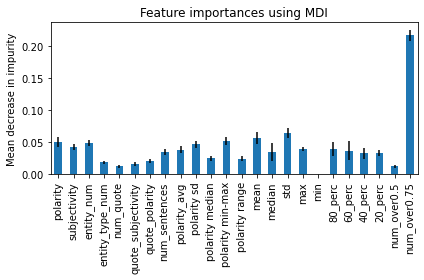

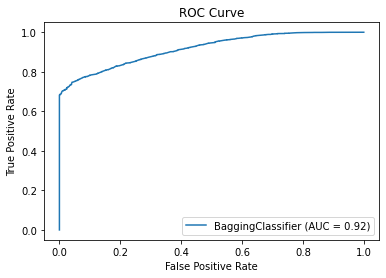

In [54]:
print('Standard Bagging')
bc_model = BaggingClassifier(n_estimators=100)
analyze_model(bc_model, X, X_test, y_test, features)

# Random Forest with Class Weighting

Random Forest with Class Weighting

Accuracy Score: 0.8859670680756943

Feature Importance from Model
-----------------------------
Feature: 0, Score: 0.03158
Feature: 1, Score: 0.02735
Feature: 2, Score: 0.02995
Feature: 3, Score: 0.01825
Feature: 4, Score: 0.00968
Feature: 5, Score: 0.01247
Feature: 6, Score: 0.01322
Feature: 7, Score: 0.02698
Feature: 8, Score: 0.02788
Feature: 9, Score: 0.03198
Feature: 10, Score: 0.02754
Feature: 11, Score: 0.03582
Feature: 12, Score: 0.02513
Feature: 13, Score: 0.05028
Feature: 14, Score: 0.03081
Feature: 15, Score: 0.09716
Feature: 16, Score: 0.07667
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.04273
Feature: 19, Score: 0.03761
Feature: 20, Score: 0.03324
Feature: 21, Score: 0.02452
Feature: 22, Score: 0.12436
Feature: 23, Score: 0.16479


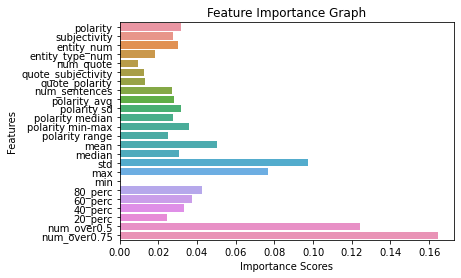

Permutation Feature Importance
------------------------------
Feature: 0, Score: 0.01062
Feature: 1, Score: 0.00922
Feature: 2, Score: 0.02192
Feature: 3, Score: 0.00450
Feature: 4, Score: 0.00151
Feature: 5, Score: 0.00078
Feature: 6, Score: 0.00054
Feature: 7, Score: 0.02361
Feature: 8, Score: 0.00771
Feature: 9, Score: 0.01448
Feature: 10, Score: 0.00398
Feature: 11, Score: 0.03212
Feature: 12, Score: 0.00406
Feature: 13, Score: 0.05604
Feature: 14, Score: 0.01453
Feature: 15, Score: 0.05853
Feature: 16, Score: 0.02052
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.03063
Feature: 19, Score: 0.01634
Feature: 20, Score: 0.01879
Feature: 21, Score: 0.01770
Feature: 22, Score: 0.04580
Feature: 23, Score: 0.05534


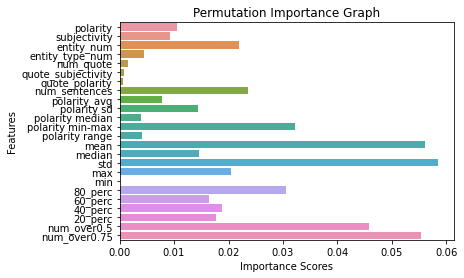

Feature Importance based on Mean Decrease in Impurity(MDI)
-----------------------------------------------------------

Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.34      0.08      0.13      1367
        high       0.33      0.92      0.48      1346

   micro avg       0.33      0.50      0.40      2713
   macro avg       0.34      0.50      0.31      2713
weighted avg       0.34      0.50      0.30      2713


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,235,393
Actual Positive,71,3370



Classification Metrics:
-----------------------
True Positives: 3370
True Negatives: 235
False Positives: 393
False Negatives: 71

True Positive Rate: 0.9793664632374309
False Positive Rate: 0.6257961783439491


The 6 metrics:
---------------
F1 Score: 0.94
Accuracy: 0.89
Precision: 0.9
Specificity: 0.37
Sensitivity: 0.98
Mis-classification: 0.11

ROC AUC Score: 0.996809647790803

Mean ROC AUC Score: 0.9189454775214804



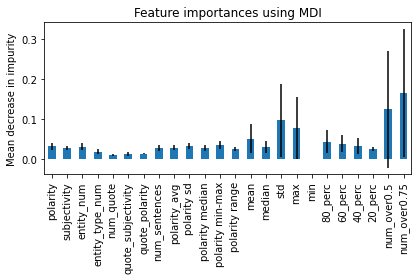

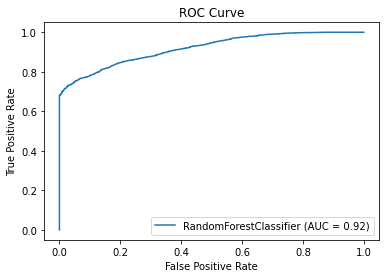

In [55]:
print('Random Forest with Class Weighting\n')
rf_cw_model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
analyze_model(rf_cw_model, X, X_test, y_test, features)

# Random Forest with Bootstrap Class Weighting

Random Forest with Bootstrap Class Weighting

Accuracy Score: 0.8871958712214303

Feature Importance from Model
-----------------------------
Feature: 0, Score: 0.03239
Feature: 1, Score: 0.02912
Feature: 2, Score: 0.03021
Feature: 3, Score: 0.01711
Feature: 4, Score: 0.00955
Feature: 5, Score: 0.01219
Feature: 6, Score: 0.01286
Feature: 7, Score: 0.02642
Feature: 8, Score: 0.02757
Feature: 9, Score: 0.03168
Feature: 10, Score: 0.02817
Feature: 11, Score: 0.03622
Feature: 12, Score: 0.02583
Feature: 13, Score: 0.05556
Feature: 14, Score: 0.03068
Feature: 15, Score: 0.08950
Feature: 16, Score: 0.06279
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.04267
Feature: 19, Score: 0.03319
Feature: 20, Score: 0.02903
Feature: 21, Score: 0.02439
Feature: 22, Score: 0.14331
Feature: 23, Score: 0.16956


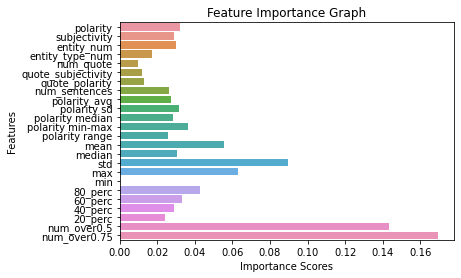

Permutation Feature Importance
------------------------------
Feature: 0, Score: 0.01031
Feature: 1, Score: 0.00949
Feature: 2, Score: 0.02283
Feature: 3, Score: 0.00428
Feature: 4, Score: 0.00096
Feature: 5, Score: 0.00060
Feature: 6, Score: 0.00056
Feature: 7, Score: 0.02551
Feature: 8, Score: 0.00740
Feature: 9, Score: 0.01482
Feature: 10, Score: 0.00439
Feature: 11, Score: 0.03204
Feature: 12, Score: 0.00592
Feature: 13, Score: 0.05497
Feature: 14, Score: 0.01415
Feature: 15, Score: 0.06011
Feature: 16, Score: 0.01415
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.03382
Feature: 19, Score: 0.01786
Feature: 20, Score: 0.01788
Feature: 21, Score: 0.01950
Feature: 22, Score: 0.04676
Feature: 23, Score: 0.05764


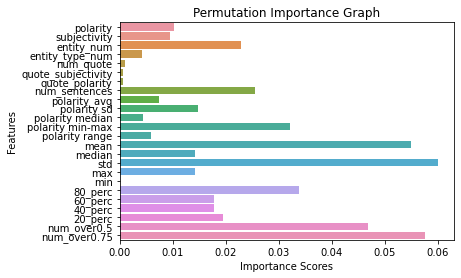

Feature Importance based on Mean Decrease in Impurity(MDI)
-----------------------------------------------------------

Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.34      0.08      0.13      1359
        high       0.33      0.93      0.49      1334

   micro avg       0.33      0.50      0.40      2693
   macro avg       0.34      0.50      0.31      2693
weighted avg       0.34      0.50      0.31      2693


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,244,384
Actual Positive,75,3366



Classification Metrics:
-----------------------
True Positives: 3366
True Negatives: 244
False Positives: 384
False Negatives: 75

True Positive Rate: 0.978204010462075
False Positive Rate: 0.6114649681528662


The 6 metrics:
---------------
F1 Score: 0.94
Accuracy: 0.89
Precision: 0.9
Specificity: 0.39
Sensitivity: 0.98
Mis-classification: 0.11

ROC AUC Score: 0.9968459320449979

Mean ROC AUC Score: 0.9193751510708569



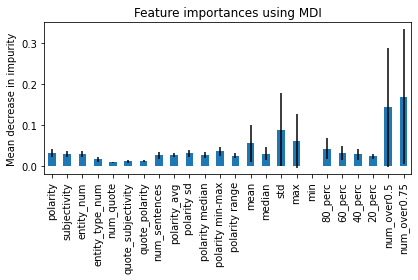

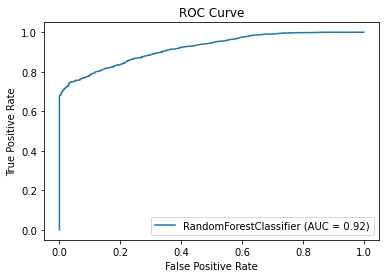

In [57]:
print('Random Forest with Bootstrap Class Weighting\n')
rf_bcw_model = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')
analyze_model(rf_bcw_model, X, X_test, y_test, features)

# Random Forest with Random Undersampling

Random Forest with Random Undersampling

Accuracy Score: 0.749078397640698

Feature Importance from Model
-----------------------------
Feature: 0, Score: 0.03154
Feature: 1, Score: 0.02805
Feature: 2, Score: 0.03082
Feature: 3, Score: 0.01838
Feature: 4, Score: 0.00956
Feature: 5, Score: 0.01175
Feature: 6, Score: 0.01334
Feature: 7, Score: 0.02773
Feature: 8, Score: 0.02728
Feature: 9, Score: 0.03266
Feature: 10, Score: 0.02831
Feature: 11, Score: 0.03553
Feature: 12, Score: 0.02717
Feature: 13, Score: 0.05064
Feature: 14, Score: 0.03491
Feature: 15, Score: 0.08032
Feature: 16, Score: 0.07293
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.04122
Feature: 19, Score: 0.03426
Feature: 20, Score: 0.03256
Feature: 21, Score: 0.02616
Feature: 22, Score: 0.13627
Feature: 23, Score: 0.16862


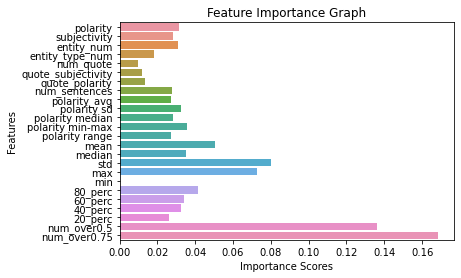

Permutation Feature Importance
------------------------------
Feature: 0, Score: 0.01019
Feature: 1, Score: 0.00755
Feature: 2, Score: 0.00794
Feature: 3, Score: 0.00415
Feature: 4, Score: 0.00467
Feature: 5, Score: 0.00477
Feature: 6, Score: 0.00448
Feature: 7, Score: 0.00413
Feature: 8, Score: 0.00511
Feature: 9, Score: 0.00881
Feature: 10, Score: 0.00467
Feature: 11, Score: 0.00457
Feature: 12, Score: 0.00246
Feature: 13, Score: 0.00263
Feature: 14, Score: 0.00106
Feature: 15, Score: 0.00623
Feature: 16, Score: 0.00761
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00401
Feature: 19, Score: 0.00296
Feature: 20, Score: -0.00092
Feature: 21, Score: 0.00403
Feature: 22, Score: -0.02099
Feature: 23, Score: -0.04131


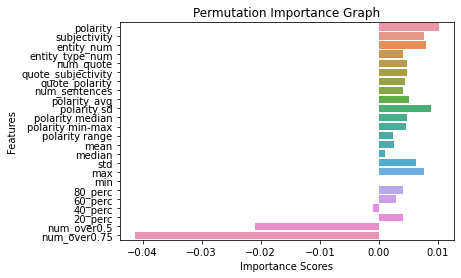

Feature Importance based on Mean Decrease in Impurity(MDI)
-----------------------------------------------------------

Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.33      0.41      0.36      1313
        high       0.35      0.62      0.45      1375

   micro avg       0.34      0.52      0.41      2688
   macro avg       0.34      0.51      0.41      2688
weighted avg       0.34      0.52      0.41      2688


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,618,10
Actual Positive,1011,2430



Classification Metrics:
-----------------------
True Positives: 2430
True Negatives: 618
False Positives: 10
False Negatives: 1011

True Positive Rate: 0.7061900610287707
False Positive Rate: 0.01592356687898089


The 6 metrics:
---------------
F1 Score: 0.83
Accuracy: 0.75
Precision: 1.0
Specificity: 0.98
Sensitivity: 0.71
Mis-classification: 0.25

ROC AUC Score: 0.9925700799058733

Mean ROC AUC Score: 0.9164522786999435



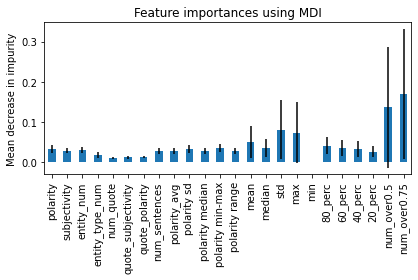

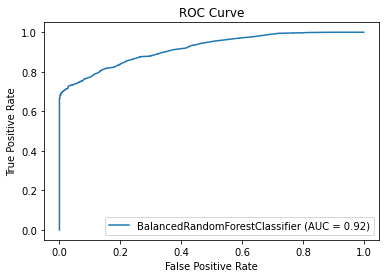

In [58]:
print('Random Forest with Random Undersampling\n')
brf_model = BalancedRandomForestClassifier(n_estimators=100)
analyze_model(brf_model, X, X_test, y_test, features)

comment the 3 feature importance lines in the **analyze_model** function before running the following cells

# Bagging with Random Undersampling

Bagging with Random Undersampling

Accuracy Score: 0.7955271565495208


Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.32      0.32      0.32      1333
        high       0.33      0.67      0.45      1368

   micro avg       0.33      0.50      0.40      2701
   macro avg       0.33      0.49      0.38      2701
weighted avg       0.33      0.50      0.38      2701


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,569,59
Actual Positive,773,2668



Classification Metrics:
-----------------------
True Positives: 2668
True Negatives: 569
False Positives: 59
False Negatives: 773

True Positive Rate: 0.7753560011624527
False Positive Rate: 0.09394904458598727


The 6 metrics:
---------------
F1 Score: 0.87
Accuracy: 0.8
Precision: 0.98
Specificity: 0.91
Sensitivity: 0.78
Mis-classification: 0.2

ROC AUC Score: 0.9929618334568316

Mean ROC AUC Score: 0.9157020807344962



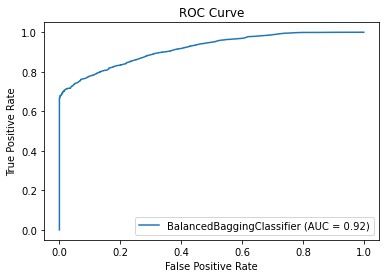

In [60]:
print('Bagging with Random Undersampling\n')
bb_model = BalancedBaggingClassifier(n_estimators=100)
analyze_model(bb_model, X, X_test, y_test, features)

# Easy Ensemble

Easy Ensemble

Accuracy Score: 0.7220447284345048


Classification Report:
----------------------
              precision    recall  f1-score   support

      medium       0.33      0.41      0.37      1358
        high       0.33      0.59      0.43      1351

   micro avg       0.33      0.50      0.40      2709
   macro avg       0.33      0.50      0.40      2709
weighted avg       0.33      0.50      0.40      2709


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,579,20
Actual Positive,1111,2359



Classification Metrics:
-----------------------
True Positives: 2359
True Negatives: 579
False Positives: 20
False Negatives: 1111

True Positive Rate: 0.6798270893371758
False Positive Rate: 0.0333889816360601

The 6 metrics:
---------------
F1 Score: 0.81
Accuracy: 0.72
Precision: 0.99
Specificity: 0.97
Sensitivity: 0.68
Mis-classification: 0.28

ROC AUC Score: 0.8859128754262378

Mean ROC AUC Score: 0.8804432829944223



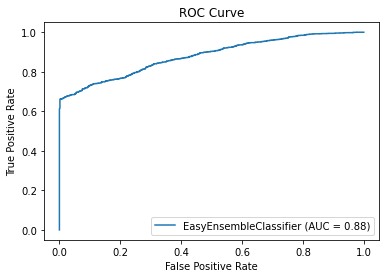

In [23]:
print('Easy Ensemble\n')
ee_model = EasyEnsembleClassifier(n_estimators=100)
analyze_model(ee_model, X, X_test, y_test, features)

# Results

The metrics from all the models display very different results but what's important in this situation is giving more credibility to an article than it deserves. We don't want to miss any reports containing human rights violations. The models with the least numbers of False Negatives (**Random Forest with Class Weighting** and **Random Forest with Bootstrap Class Weighting**) are the most suitable for this classification problem since they are unlikely to disregard articles containing human rights violations.

# Generate new model based on most important features

Define a threshold value for finding most important features. Remove features whose importance scores don't meet the threshold value and only use features whose scores meet the threshold value for building the new model.